In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

heart_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

c:\Users\sasha\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
heart_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


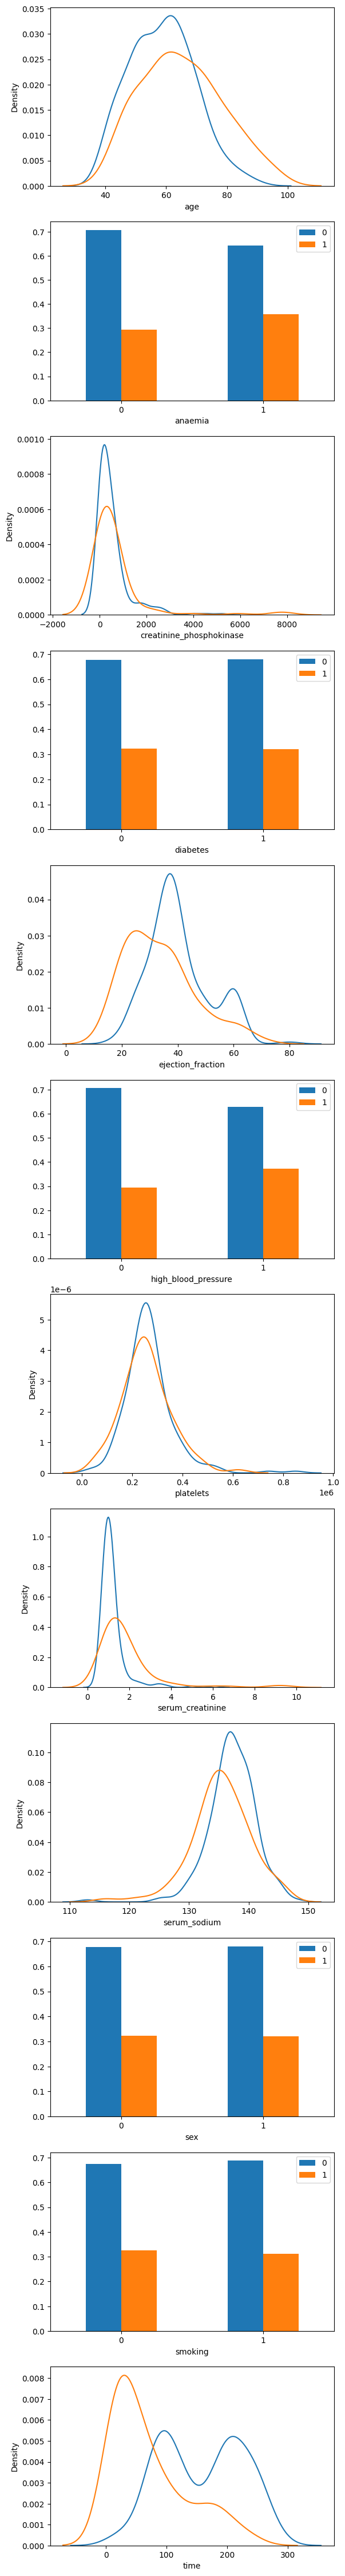

In [3]:
import warnings

def plot_columns():
    dim = heart_df.drop('DEATH_EVENT', axis=1).shape
    _, ax = plt.subplots(dim[1], 1, figsize=(6.4, 4.8*dim[1]))
    for i in range(dim[1]):
        if len(heart_df.iloc[:,i].unique()) == 2:
            pd.crosstab(heart_df.iloc[:,i], heart_df.DEATH_EVENT, normalize='index').plot(kind='bar', rot=0, ax=ax[i])
            ax[i].legend(loc='upper right')
        else:
            sns.kdeplot(heart_df[heart_df.DEATH_EVENT == 0].iloc[:,i], ax=ax[i])
            sns.kdeplot(heart_df[heart_df.DEATH_EVENT == 1].iloc[:,i], ax=ax[i])
    plt.show()

with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    plot_columns()

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

continuous_cols = 'age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time'
discrete_cols = 'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'

continous_scaled = scaler.fit_transform(heart_df.loc[:,continuous_cols])

continuous_df = pd.DataFrame(continous_scaled, columns=scaler.feature_names_in_)

X = pd.concat((continuous_df, heart_df.loc[:,discrete_cols]), axis=1)
y = heart_df.loc[:,'DEATH_EVENT']

In [5]:
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

model = Sequential()

# input layer
model.add(Dense(units=12, activation='relu'))

# hidden layer
model.add(Dense(units=6, activation='relu'))

# output layer
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.2)

Epoch 1/100

3/3 [==============================] - 1s 86ms/step - loss: 0.6941 - val_loss: 0.6953
Epoch 2/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6910 - val_loss: 0.6919
Epoch 3/100
3/3 [==============================] - 0s 13ms/step - loss: 0.6879 - val_loss: 0.6885
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6853 - val_loss: 0.6854
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6825 - val_loss: 0.6825
Epoch 6/100
3/3 [==============================] - 0s 12ms/step - loss: 0.6797 - val_loss: 0.6796
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6770 - val_loss: 0.6769
Epoch 8/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6743 - val_loss: 0.6742
Epoch 9/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6717 - val_loss: 0.6714
Epoch 10/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6689 - val_loss: 0.6689
Epoch 11/100
3/3 [

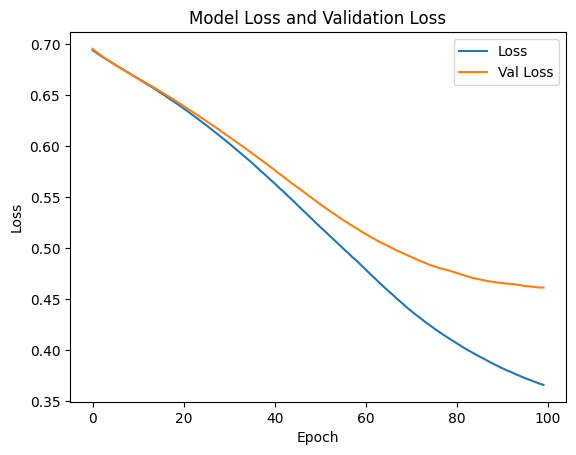

In [7]:
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.title('Model Loss and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
y_proba = model.predict(X_test).flatten()
y_pred = np.where(y_proba < 0.5, 0, 1).flatten()

2/2 [==============================] - 0s 6ms/step


              precision    recall  f1-score   support

           0       0.89      0.83      0.86        41
           1       0.68      0.79      0.73        19

    accuracy                           0.82        60
   macro avg       0.79      0.81      0.80        60
weighted avg       0.83      0.82      0.82        60



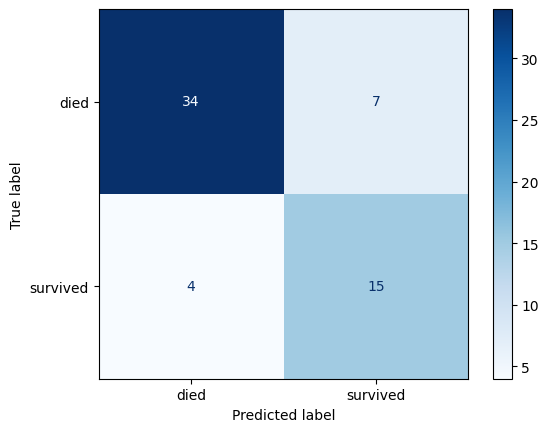

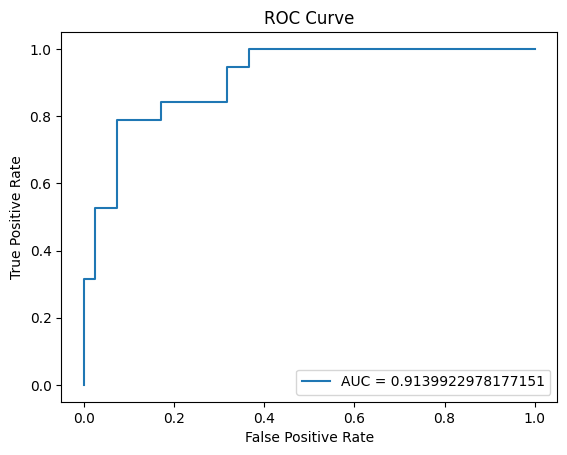

In [9]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
display = metrics.ConfusionMatrixDisplay(confusion_matrix)
display.plot(cmap='Blues')
x_locs, _ = plt.xticks()
y_locs, _ = plt.yticks()
plt.xticks(x_locs, ['died', 'survived'])
plt.yticks(y_locs, ['died', 'survived'])
plt.show()

fpr, tpr, _ = metrics.roc_curve(y_test, y_proba)
auc = metrics.roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr, label = f'AUC = {auc}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()